In [1]:
%matplotlib widget

ERROR! Session/line number was not unique in database. History logging moved to new session 2251


# Analysis and Inversion of ERT measurements

Note: Use data files in the form `ERT*_clean.Dat`.
This files were denoised manually in `ProsysII` and saved in `Res2dinv` data format
Original files are in folder `ERT_data`

In [2]:
# Import libraries
import pygimli as pg
from pygimli.physics import ert
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [3]:
# Import data for a specific line

data = ert.load('field_data/ERT_data/ERT1_clean.Dat', load=True, verbose=True)
data

21/04/24 - 17:55:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 72 data: 2801, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

## Review data

In [4]:
# Create geometric factors

data['k'] = ert.createGeometricFactors(data, numerical=True)

21/04/24 - 17:55:33 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 3): /home/mariacarrizo/.cache/pygimli/2041646891609144290


In [5]:
# Create the ERT data manager

mgr = ert.ERTManager(sr=False)

21/04/24 - 17:55:34 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 4): /home/mariacarrizo/.cache/pygimli/1902124404465129355


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fda2c8ccf10>)

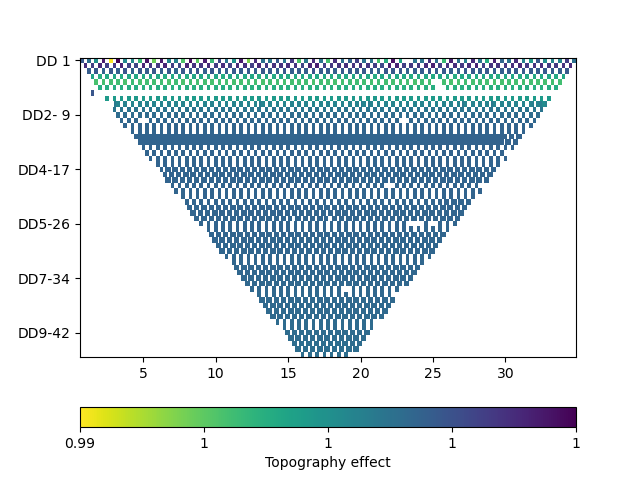

In [6]:
# Review data values

k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect', cMap='viridis_r')

In [7]:
# Check that data is OK

mgr.checkData(data)
print(data)

Data: Sensors: 72 data: 2801, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fda2d2f0a90>)

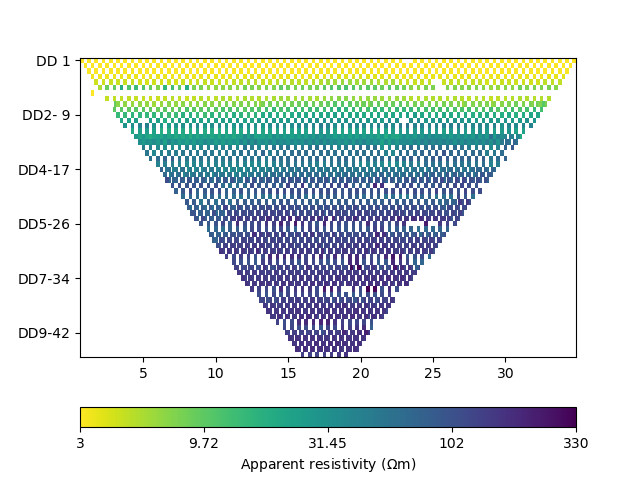

In [8]:
# Check data errors

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100, cMap='viridis_r')

## Start inversion and Show Results

Note: Around 10 minutes computing

In [9]:
mod = mgr.invert(data, lam=100, verbose=False,
                 paraDX=0.3, paraMaxCellSize=10, paraDepth=6, quality=33.6)

21/04/24 - 17:55:37 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 17:55:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 17:55:37 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 17:55:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 17:55:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/04/24 - 17:55:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 17:55:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5433 Cells: 10336 Boundaries: 8016
21/04/24 - 17:55:37 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 17:55:37 - pyGIMLi - INFO - Created startmodel from forward operator: 1937, min/max=0.900000/0.900000


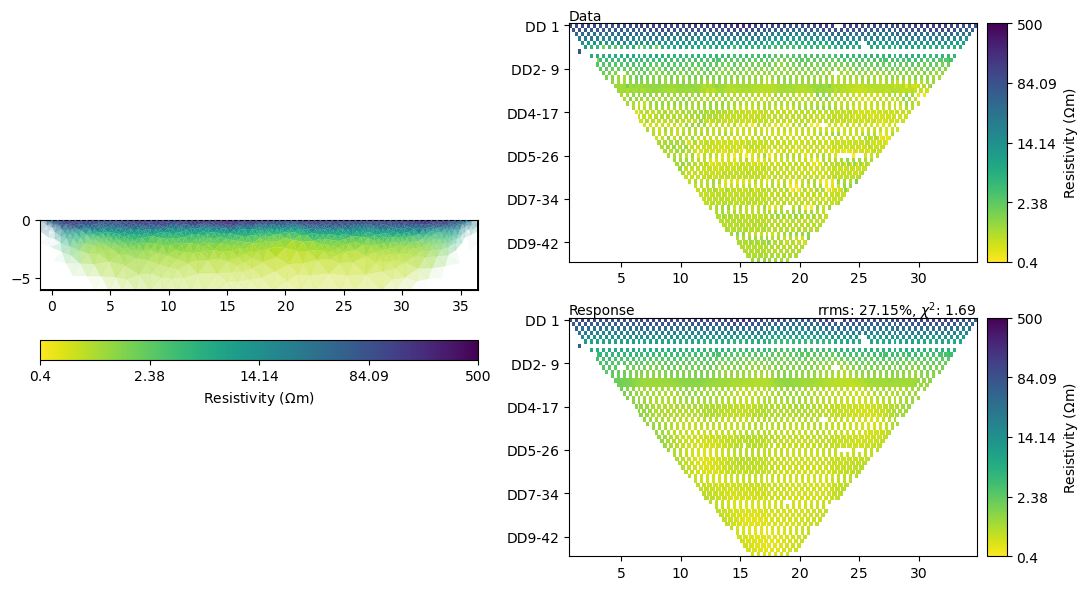

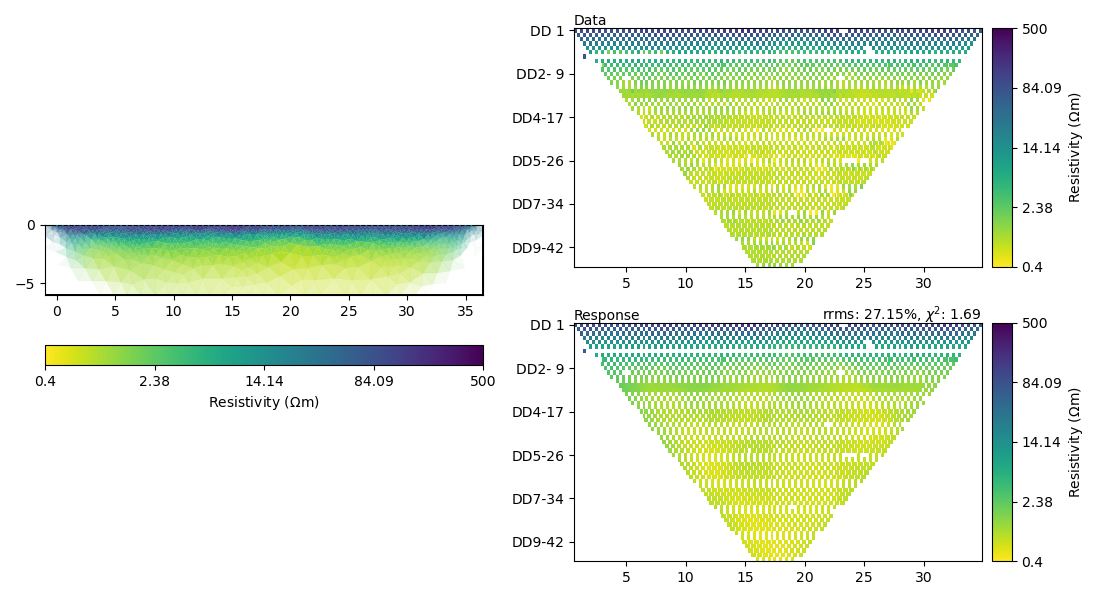

In [14]:
mgr.showResultAndFit(cMin=0.4, cMax=500, cMap='viridis_r')
#plt.savefig('figures/ERT4')

Text(0.5, 1.0, 'ERT Inversion')

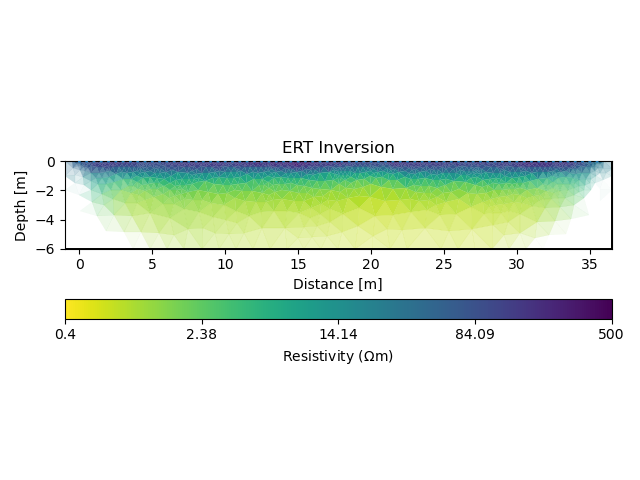

In [34]:
fig, ax = plt.subplots()

#mgr.showResult(cMin=0.1, cMax=60, cMap='viridis_r')
mgr.showModel(cMin=0.4, cMax=500, cMap='viridis_r', elecs=True, ax=ax, zMax=6, )
#ax.set_xlim([0,36])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [m]')
plt.tight_layout()
ax.set_title('ERT Inversion')
#rmse = root_mean_squared_error(models.ravel(), models_est.ravel())

#ax.text(0, -5,  "{:1.2f}".format(1.86), fontsize='small')

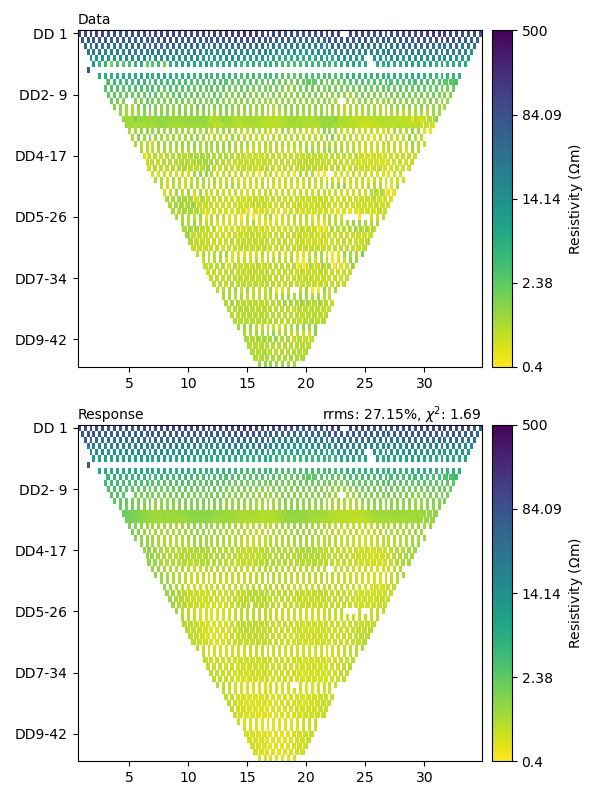

In [33]:
fig, ax = plt.subplots(2,1,figsize=(6,8))
inputs ={'fontsize':7}
mgr.showFit(axs=ax, cMin=0.4, cMax=500, cMap='viridis_r', **inputs)
plt.tight_layout()

# Save Results
#mgr.saveResult('results/ERT4')